# **Function to plot decision surfaces**

In [ ]:
  import matplotlib.pyplot as plt
  
  def plot_decision_surface(data, target, classes, class_names, model):
    min1, max1 = data[:, 0].min()-1, data[:, 0].max()+1
    min2, max2 = data[:, 1].min()-1, data[:, 1].max()+1
    # define the x and y scale
    x1grid = np.arange(min1, max1, 0.01)
    x2grid = np.arange(min2, max2, 0.01)
    # create all of the lines and rows of the grid
    xx, yy = np.meshgrid(x1grid, x2grid)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))

    yhat = model.predict(grid)
    zz = yhat.reshape(xx.shape)

    fig = plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, zz, cmap='Paired', alpha=0.75)

    for class_value in range(len(classes)):
      # get row indexes for samples with this class
      row_ix = np.where(target == class_value)
      # create scatter of these samples
      plt.scatter(data[row_ix, 0], data[row_ix, 1], label=class_names[class_value], cmap='Paired')
    
    plt.legend(loc='upper left')

# **Binary classification**

**Loading the data**

In [ ]:
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:,2:] # petal length and width in cm
y = (iris.target == 2).astype(np.int) # 1 if Iris virginica, else 0

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=7)

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

Logistic = LogisticRegression(penalty='none', random_state=7)
Logistic.fit(X_train, y_train)

acc_train = Logistic.score(X_train, y_train)
acc_test = Logistic.score(X_test, y_test)

print('Accuracy on training set = %2.2f' % acc_train)
print('Accuracy on test set = %2.2f' % acc_test)

Accuracy on training set = 0.98
Accuracy on test set = 0.87


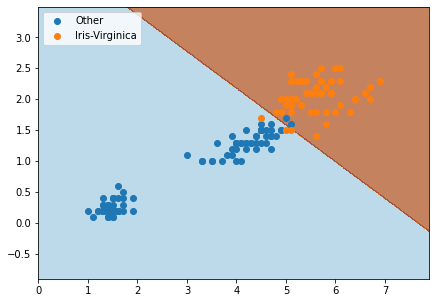

In [ ]:
plot_decision_surface(X, y, np.unique(y), ['Other', 'Iris-Virginica'], Logistic)

## **K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

acc_train = knn.score(X_train, y_train)
acc_test = knn.score(X_test, y_test)

print('Accuracy on training set = %2.2f' % acc_train)
print('Accuracy on test set = %2.2f' % acc_test)

Accuracy on training set = 0.98
Accuracy on test set = 0.87


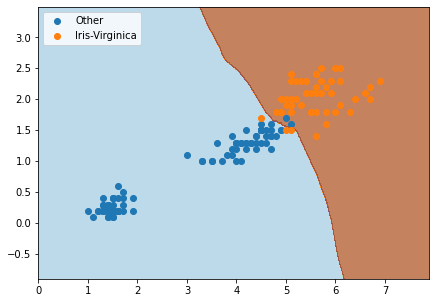

In [ ]:
plot_decision_surface(X, y, np.unique(y), ['Other', 'Iris-Virginica'], knn)

## **Gaussian Naive-Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

gNB = GaussianNB()
gNB.fit(X_train, y_train)

acc_train = gNB.score(X_train, y_train)
acc_test = gNB.score(X_test, y_test)

print('Accuracy on training set = %2.2f' % acc_train)
print('Accuracy on test set = %2.2f' % acc_test)

Accuracy on training set = 0.98
Accuracy on test set = 0.93


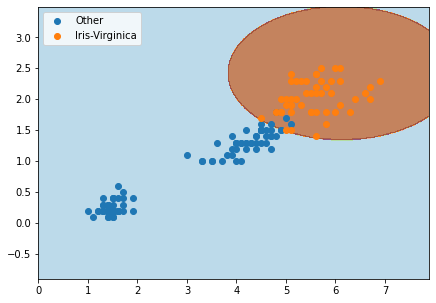

In [ ]:
plot_decision_surface(X, y, np.unique(y), ['Other', 'Iris-Virginica'], gNB)

# **Multiclass classification**

**Loading the data**

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:,2:]
y = iris.target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=7)

## **Softmax Regression**

In [ ]:
Softmax = LogisticRegression(max_iter=1000, penalty='none', random_state=7)
Softmax.fit(X_train, y_train)

acc_train = Softmax.score(X_train, y_train)
acc_test = Softmax.score(X_test, y_test)

print('Accuracy on training set = %2.2f' % acc_train)
print('Accuracy on test set = %2.2f' % acc_test)

Accuracy on training set = 0.99
Accuracy on test set = 0.87


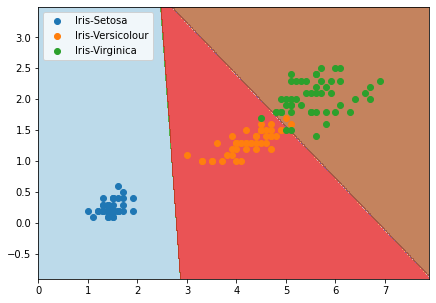

In [ ]:
plot_decision_surface(X, y, np.unique(y), ['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'], Softmax)

## **K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5 , weights='uniform')
knn.fit(X_train, y_train)

acc_train = knn.score(X_train, y_train)
acc_test = knn.score(X_test, y_test)

print('Accuracy on training set = %2.2f' % acc_train)
print('Accuracy on test set = %2.2f' % acc_test)

Accuracy on training set = 0.98
Accuracy on test set = 0.87


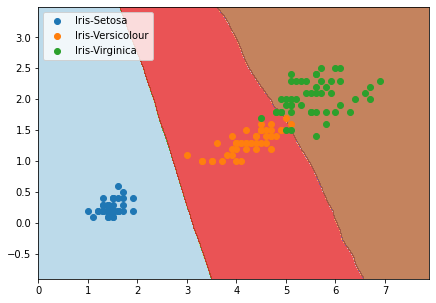

In [ ]:
import numpy as np

plot_decision_surface(X, y, np.unique(y), ['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'], knn)

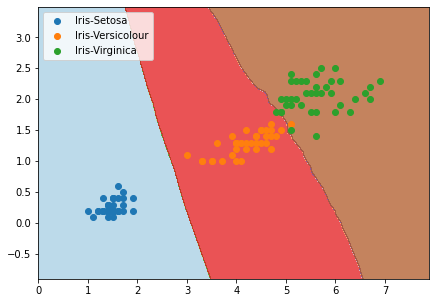

In [ ]:
import numpy as np

plot_decision_surface(X_train, y_train, np.unique(y), ['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'], knn)

## **Gausian Naive-Bayes**

In [ ]:
gNB = GaussianNB()
gNB.fit(X_train, y_train)

acc_train = gNB.score(X_train, y_train)
acc_test = gNB.score(X_test, y_test)

print('Accuracy on training set = %2.2f' % acc_train)
print('Accuracy on test set = %2.2f' % acc_test)

Accuracy on training set = 0.98
Accuracy on test set = 0.87


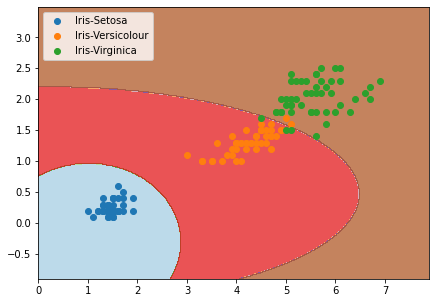

In [ ]:
plot_decision_surface(X, y, np.unique(y), ['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'], gNB)

# **Document classification**

**Loading the data**

In [ ]:
from sklearn.datasets import fetch_20newsgroups

categories = ['comp.graphics', 'rec.autos', 'rec.motorcycles', 
              'rec.sport.baseball', 'rec.sport.hockey', 'sci.electronics',
              'sci.med', 'sci.space']

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  remove=('headers', 'footers', 'quotes'),
                                  random_state=7)

twenty_test = fetch_20newsgroups(subset='test', categories=categories,
                                  remove=('headers', 'footers', 'quotes'),
                                  random_state=7)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

X_train = vect.fit_transform(twenty_train.data)
X_test = vect.transform(twenty_test.data)

y_train = twenty_train.target
y_test = twenty_test.target

In [ ]:
X_train.shape

(4751, 40880)

## **Multinomial Naive-Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mNB = MultinomialNB()
mNB.fit(X_train, y_train)

acc_train = mNB.score(X_train, y_train)
acc_test = mNB.score(X_test, y_test)

print('Accuracy on training set = %2.2f' % acc_train)
print('Accuracy on test set = %2.2f' % acc_test)

Accuracy on training set = 0.91
Accuracy on test set = 0.80


## **Bernoulli Naive-Bayes**

In [ ]:
from sklearn.naive_bayes import BernoulliNB

bNB = BernoulliNB()
bNB.fit(X_train.astype('bool'), y_train)

print('Accuracy on training set = %2.2f' % bNB.score(X_train.astype('bool'), y_train))
print('Accuracy on test set = %2.2f' % bNB.score(X_test.astype('bool'), y_test))

Accuracy on training set = 0.76
Accuracy on test set = 0.63


## **[Complement Naive Bayes](https://people.csail.mit.edu/jrennie/papers/icml03-nb.pdf)**

In [ ]:
from sklearn.naive_bayes import ComplementNB

cNB = ComplementNB()
cNB.fit(X_train, y_train)

acc_train = cNB.score(X_train, y_train)
acc_test = cNB.score(X_test, y_test)

print('Accuracy on training set = %2.2f' % acc_train)
print('Accuracy on test set = %2.2f' % acc_test)

Accuracy on training set = 0.93
Accuracy on test set = 0.83
